<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Sesiones/Sesion_03_intuicion_estadistica_II_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



In [4]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm
from matplotlib import cm
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
#Machinig learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit

In [5]:
# @title Libs codes: Meshgrid and learning curves
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_contoursExact(ax, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# Repaso:
# 2 Dimensiones

### Caso Bivariante



Una función de densidad conjunta es una función que describe la probabilidad de que dos o más variables aleatorias tomen ciertos valores simultáneamente,
para el caso bivariante es:

\begin{equation}
f(x, y) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp \left( -\frac{1}{2(1-\rho^2)} \left(\frac{x^2}{\sigma_x^2} + \frac{y^2}{\sigma_y^2} - \frac{2\rho xy}{\sigma_x \sigma_y} \right) \right)
\end{equation}

Donde:

- $\rho$ es el coeficiente de correlación.
- Las medias de las variables son $(0, 0)$.

La matriz de covarianzas está dada por:

\begin{equation}
\Sigma =  
\begin{bmatrix}
\sigma_x^2 & \rho \sigma_x \sigma_y  \\
\rho \sigma_x \sigma_y & \sigma_y^2
\end{bmatrix}
\end{equation}


La anterior funcion cumple que:


\begin{equation}
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y)\mathrm{dx}\mathrm{dy} = 1
\end{equation}



### En el caso caso mas general

Para el caso más general, la función de densidad conjunta para una distribución normal multivariante se expresa como:

\begin{equation}
f_X(x_1,x_2, ... x_n) = \frac{1}{2\pi^{n/2}|\Sigma|^{1/2}} \exp\left( -\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)
\end{equation}

Donde $|\Sigma|$ es el determinante de la matriz de covarianza $\Sigma$.


Veamos un ejemplo para valor de $\mu$ y $\Sigma$, dados de la siguiente forma:

\begin{equation}
\mu =  
\begin{bmatrix}
0 \\
0 \\
\end{bmatrix}
\end{equation}

\begin{equation}
\Sigma =  
\begin{bmatrix}
1 & 0  \\
0 & 1\\
\end{bmatrix}
\end{equation}


\begin{equation}
\Sigma =  
\begin{bmatrix}
1 & 0.5  \\
0.5 & 1\\
\end{bmatrix}
\end{equation}


\begin{equation}
\Sigma =  
\begin{bmatrix}
1 & 0.8  \\
0.8 & 1\\
\end{bmatrix}
\end{equation}


Text(0, 0.5, '$PDF(X_1, X_2)$')

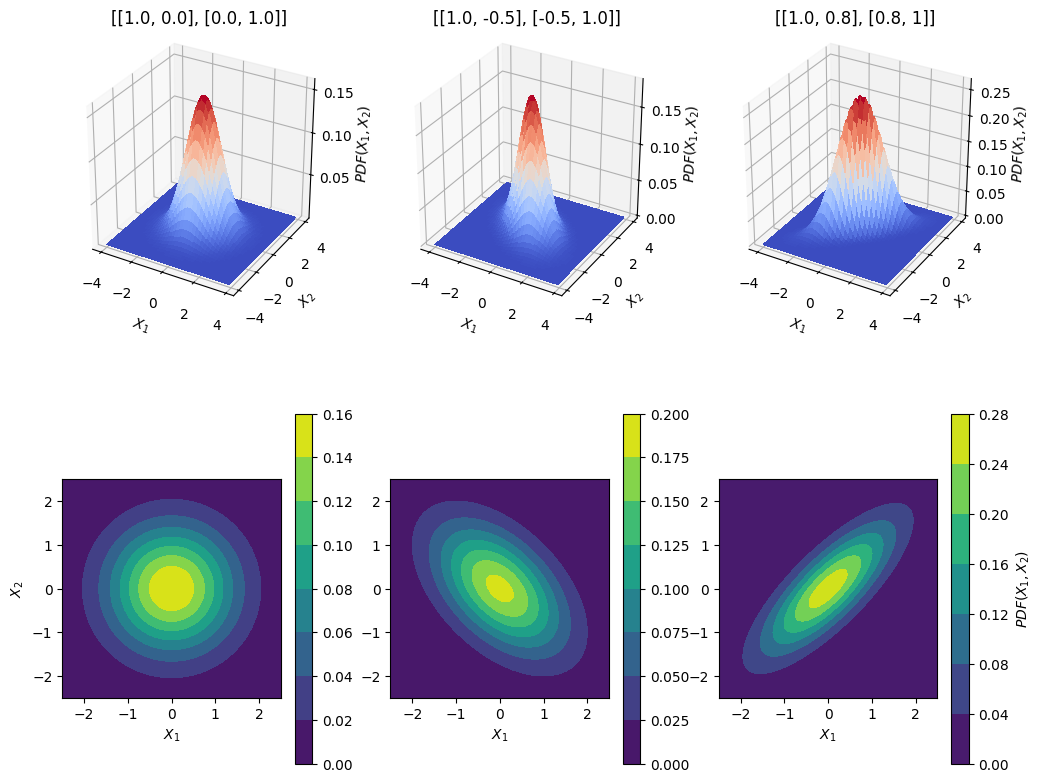

In [6]:
# @title Funcion de distribucion de probabilidad

x, y = np.mgrid[-4:4:.1, -4:4:.1]
pos = np.dstack((x, y))
mu = [0.0, 0.0]                 # Centrada en el origen
cov = [[1.0, 0.0], [0.0, 1.0]]  # Matriz de covarianzas identidad
rv = multivariate_normal(mu, cov)

x1, y1 = np.mgrid[-4:4:.1, -4:4:.1]
pos1 = np.dstack((x1, y1))
mu1 = [0.0, 0.0]                 # Centrada en el origen
cov1 = [[1.0, -0.5], [-0.5, 1.0]]  # Matriz de covarianzas identidad
rv1 = multivariate_normal(mu1, cov1)

x2, y2 = np.mgrid[-4:4:.1, -4:4:.1]
pos2 = np.dstack((x2, y2))
mu2 = [0.0, 0.0]                 # Centrada en el origen
cov2 = [[1.0, 0.8], [0.8, 1]]  # Matriz de covarianzas identidad
rv2 = multivariate_normal(mu2, cov2)


# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2, 3, 1, projection='3d')
ax.set_aspect('equal')
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x,y, rv.pdf(pos), cmap = cm.coolwarm,
                       linewidth = 0, antialiased = False)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$PDF(X_1,X_2)$")
ax.set_title(f"{cov}")

ax = fig.add_subplot(2, 3, 2, projection='3d')
ax.set_aspect('equal')
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x1,y1, rv1.pdf(pos1), cmap = cm.coolwarm,
                       linewidth = 0, antialiased = False)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$PDF(X_1,X_2)$")
ax.set_title(f"{cov1}")

ax = fig.add_subplot(2, 3, 3, projection='3d')
ax.set_aspect('equal')
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x2,y2, rv2.pdf(pos2), cmap = cm.coolwarm,
                       linewidth = 0, antialiased = False)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$PDF(X_1,X_2)$")
ax.set_title(f"{cov2}")

#=============================================================
ax = fig.add_subplot(2, 3, 4)
cs = ax.contourf(x, y, rv.pdf(pos))
ax.set_aspect('equal')
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
cbar = fig.colorbar(cs)
#cbar.ax.set_ylabel('PDF(X_1, X_2)$')

ax = fig.add_subplot(2, 3, 5)
cs = ax.contourf(x1, y1, rv1.pdf(pos1))
ax.set_aspect('equal')
ax.set_xlabel("$X_1$")
#ax.set_ylabel("$X_2$")
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
cbar = fig.colorbar(cs)
#cbar.ax.set_ylabel('PDF(X_1, X_2)$')

ax = fig.add_subplot(2, 3, 6)
ax.set_aspect('equal')
cs = ax.contourf(x2, y2, rv2.pdf(pos2))
ax.set_xlabel("$X_1$")
#ax.set_ylabel("$X_2$")
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('$PDF(X_1, X_2)$')
#=============================================================


# Dado el siguiente dataset:

|m         |Y  (Var. indep)       | $X_1$ (feature 1)      |$X_2$     (feature2)  |
| --------|-----------|-------------|-----------|
|1        |$Y^{(1)}$  | $X_1^{(1)}$ |  $X_2^{(1)}$|
|2        |$Y^{(2)}$  | $X_1^{(2)}$ | $X_2^{(2)}$|
| ...        |...          | ...           |...          |
|...        |...          | ...           |...          |
|...      |...         | ...           |...         |
|m        |$Y^{(m)}$ | $X_1^{(m)}$  |$X_2^{(m)}$|



In [7]:
def data( mu=[1,1], mu1=[-2,2], cov=[[1.0, 0.0], [0.0, 1.0]] , cov1= [[1.0, -0.5], [-0.5, 1.0]]   ):# Caso mas visible
  rv = multivariate_normal(mu, cov)
  rv1 = multivariate_normal(mu1, cov1)
  return rv, rv1

def sample(N1= 1000, N2 = 100, r = 0.2):
  X_t = np.concatenate([rv.rvs(N1, random_state = r  ), rv1.rvs(N2,random_state = r)]) # Todos los datos en la misma distribución,
  y   = np.concatenate([np.zeros(N1), np.ones(N2) ]  )
  return X_t, y


In [10]:
def graph_gaussian_contour(x, y, pos, rv,  rv2):
  fig = plt.figure(figsize = (12,6))
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  surf1 = ax.plot_surface(x,y, rv.pdf(pos) + rv1.pdf(pos), cmap = cm.coolwarm,
                        linewidth = 0, antialiased = False)
  ax.set_xlabel("$X_1$")
  ax.set_ylabel("$X_2$")
  ax.set_zlabel("$PDF(X_1,X_2)$")
  #=============================================================
  ax = fig.add_subplot(1, 2, 2)
  cs1 = ax.contourf(x, y, rv.pdf(pos) + rv1.pdf(pos)  )
  #cs2 = ax.contourf(x1, y1, rv1.pdf(pos1) )
  ax.set_xlabel("$X_1$")
  ax.set_ylabel("$X_2$")
  #ax.set_xlim(-2.5,2.5)
  #ax.set_ylim(-2.5,2.5)
  cbar = fig.colorbar(cs1)
# Histograma de los datos sinteticos a estudiar


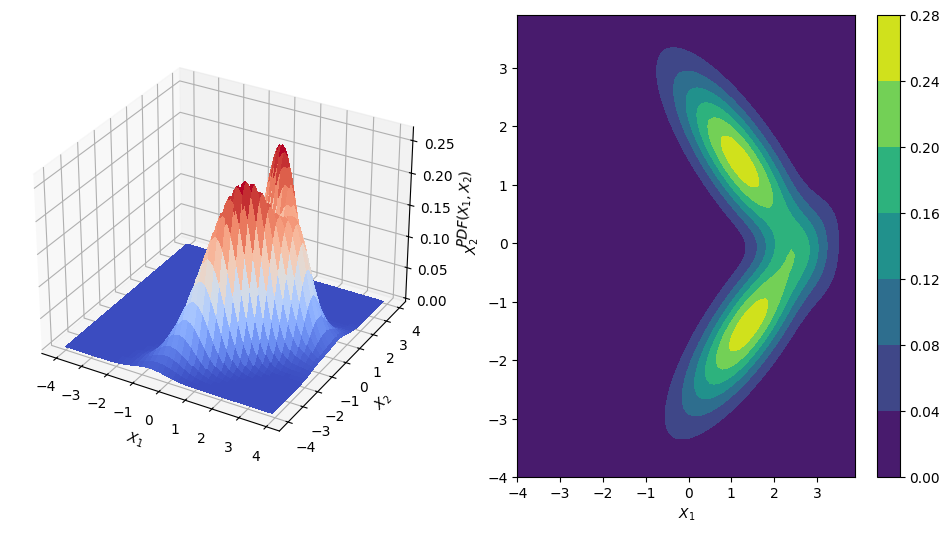

In [11]:
rv, rv1 = data( mu=[1.2,1.4], mu1=[1.4,-1.4],
     cov=[[1.0, -0.8], [-0.8, 1.0]] ,
     cov1= [[1.0, 0.8], [0.8, 1.0]])
#Mesh para la grafica en 3D
x, y = np.mgrid[-4:4:.1, -4:4:.1]
pos = np.dstack((x, y))
graph_gaussian_contour(x, y, pos, rv, rv1)

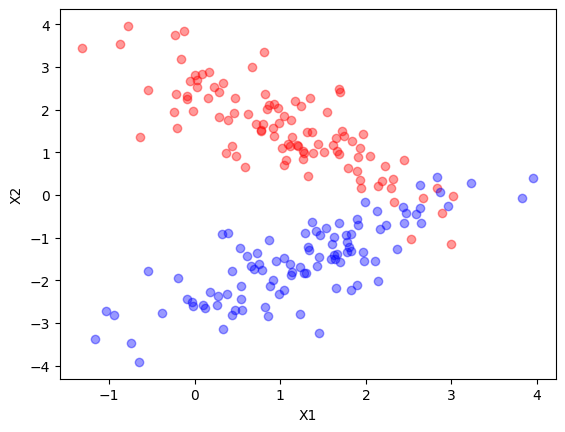

In [12]:
rv, rv1 = data( mu=[1.2,1.4], mu1=[1.4,-1.4],
     cov=[[1.0, -0.8], [-0.8, 1.0]] ,
     cov1= [[1.0, 0.8], [0.8, 1.0]])
X_t, y = sample(N1 = 100, N2 = 100, r = 10)

plt.plot(X_t[y==0][:,0],X_t[y==0][:,1],"ro", alpha=0.4)
plt.plot(X_t[y==1][:,0],X_t[y==1][:,1],"bo", alpha=0.4)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [13]:
from pydub import AudioSegment
from pydub.generators import Sine
import numpy as np
import pandas as pd

# Definir una escala musical (notas en Hz) para hacer el sonido más armónico
scale_class_0 = [261.63]#, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88]  # Clase 0: tonos graves
scale_class_1 = [987.77]#, 587.33, 659.25, 698.46, 783.99, 880.00, 987.77]  # Clase 1: tonos agudos

# Función para generar sonido basado en la clase Y, usando notas musicales
def generate_harmonic_sound(X1, Y, duration=500):
    # Seleccionar la escala según la clase
    if Y == 0:
        scale = scale_class_0  # Tonos graves
    else:
        scale = scale_class_1  # Tonos agudos

    # Normalizar X1 para seleccionar una nota de la escala, asegurando que esté en el rango
    normalized_X1 = (X1 + 1) / 2  # Escalar X1 entre 0 y 1
    # Asegurar que el índice siempre esté dentro del rango de la escala
    note_index = int(normalized_X1 * (len(scale) - 1))
    note_index = min(max(0, note_index), len(scale) - 1)  # Limitar el índice entre 0 y len(scale)-1
    # Obtener la frecuencia correspondiente a la nota seleccionada
    frequency = scale[note_index]
    # Generar un tono con la frecuencia seleccionada
    tone = Sine(frequency).to_audio_segment(duration=duration)

    # Aplicar un envelope suave (fade in y fade out) para que el sonido sea más agradable
    tone = tone.fade_in(100).fade_out(100)

    return tone

# Generar un dataset de ejemplo con 200 valores para X1, X2, y Y
np.random.seed(42)
X_t = np.random.uniform(-1, 1, (200, 2))
y = np.random.choice([0, 1], 200)
data2 = pd.DataFrame(X_t, columns=["X1", "X2"])
data2["Y"] = y

# Barajar el dataset
data_shuffled = data2.sample(frac=1, random_state=42).reset_index(drop=True)
data2 = data_shuffled

# Generar sonidos para cada punto del dataset
sound = AudioSegment.silent(duration=0)  # Sonido vacío para comenzar

for index, row in data2.iterrows():
    tone = generate_harmonic_sound(row['X1'], row['Y'])
    sound += tone  # Añadir el tono al sonido total

# Guardar el sonido en un archivo .wav
sound.export("dataset_sonification_harmonic_500_corrected.wav", format="wav")


ModuleNotFoundError: No module named 'pydub'

## Ejercicio 1.

a) Generar una distribución multivariada  en:

1. 1D,
2. 2D,
3. 3D,



b) Generar una segunda distribucion multivariada para el caso de 3D:

4. 3D

Asignar a la distribucion multivariada del numeral a), la clase 0,
Asignar a la distribucion multivariada del numeral b), la clase 1.


¿Qué tipo de frontera se puede presentar en el caso 1D ?

¿Qué tipo de frontera se puede presentar en el caso 2D ?

¿Qué tipo de frontera se puede presentar en el caso 3D ?

¿Qué tipo de frontera se puede presentar en el caso 4D ?

¿Como puedo encontrar la frontera de desiscion en este caso?


``` python
from scipy.stats import multivariate_normal
```
Sugerencias para el gráfico

``` python
Z = f.pdf(u)
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax.plot_surface(X,Y, Z, cmap = cm.coolwarm,
                        linewidth = 0, antialiased = False)
ax.contour(X, Y, Z, zdir='x', offset=0, cmap=cm.coolwarm, stride=1)
ax.contour(X, Y, Z, zdir='y', offset=2, cmap=cm.coolwarm)
```

In [14]:
....

SyntaxError: invalid syntax (1805539695.py, line 1)

# Curvas de aprendizaje

Las curvas de aprendizaje permiten evaluar las métricas de rendimiento de un modelo y analizar la efectividad de la separación realizada por el estimador. Además, son útiles para identificar cuándo un modelo de machine learning está experimentando overfitting y underfitting.

Su construccion puede ser realizada como sigue:


1. El datasets se divide K veces en entrenamiento y validación.
```
x_t_index = [0, 1, 2, 3 4, 5, 6, 7, 8, 9]
```

|div|train_index     |test_index |
|---|----------------|-----------|
| 1 |[9 8 6 7 0 4 2] |[3 1 5]|
| 2 |[0 7 9 3 2 1 4] | [5 8 6]|
| 3 |[8 6 5 2 9 7 3] | [0 1 4]|
| 4 |[5 9 4 6 3 0 2] |[7 8 1]|
|k=5|[3 5 8 1 7 6 0] | [9 2 4]|


2. Se construyen subconjunto del dataset de entrenamiento   para entrenar el estimador.

|split| train_index(div 1)|train_index(div 2)| ... |execution|
|-----|--------------------|-----------------|-----|---------|    
| 1   |[9, 8]            | [0, 7]            | ... |    i    |
| 2   |[9, 8, 6]         | [0, 7, 9]         | ... | i    |
| 3   |[9,8,6, 7, 0]     |  [0, 7, 9,3]      | ... | i    |
| 4   |[9,8,6, 7, 0, 4]  |  [0, 7, 9,3, 2]   | ... | i    |
| 5   |[9, 8, 6]         |[0, 7, 9,3, 2,1]   | ... | i    |
| 6   |[9,8,6, 7, 0, 4,2]| [0, 7, 9,3, 2,1,4]| ... | i    |




3. Se computan los scores para los datos de entrenamiento y validación.

4. Se promedian los scores de los  datos de entrenamiento y validación


# Overfitting:

El overfitting ocurre cuando un modelo tiene una complejidad excesiva, como intentar ajustar una función lineal con un polinomio de grado superior. En este caso, se dice que el modelo está memorizando los datos en lugar de generalizar a nuevos datos.

1. Con las covarianzas dadas, realiza las siguientes pruebas: ¿Mejora la separación de los datos al aumentar el tamaño del conjunto de datos?

2. El hiperparámetro $\gamma$ define la complejidad de la frontera de decisión. ¿Qué sucede si se reduce el valor de gamma?


In [15]:
q = X_t[0:10]
cv = ShuffleSplit(n_splits = 5, test_size=0.3, random_state=None)
for train_index,test_index in cv.split(q):
  print(train_index,test_index)

[9 7 3 1 2 6 4] [8 5 0]
[2 3 9 5 1 8 4] [6 7 0]
[8 6 7 1 0 3 4] [9 5 2]
[0 2 1 6 7 8 3] [9 4 5]
[4 0 1 6 7 5 3] [9 2 8]


In [16]:
len(X_t)

200

Training error:0.979
Test error: 0.896


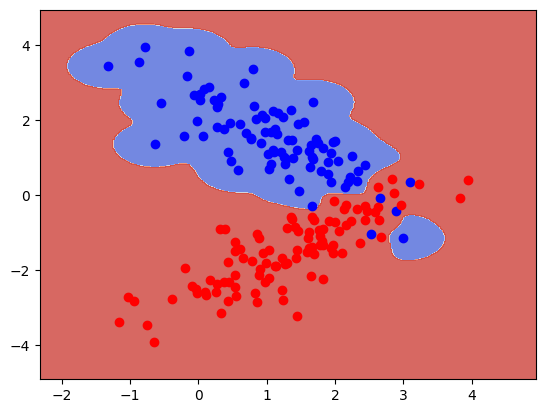

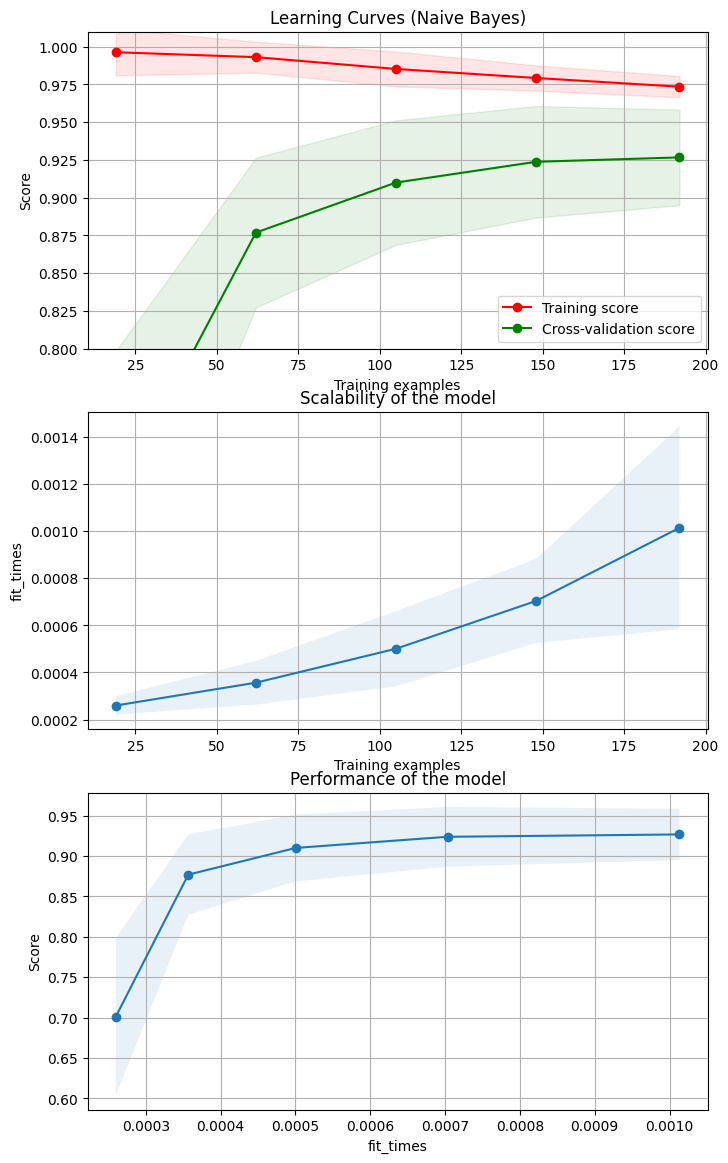

In [17]:
rv, rv1 = data( mu=[1.2,1.4], mu1=[1.4,-1.4],cov=[[1.0, -0.8], [-0.8, 1.0]] ,cov1= [[1.0, 0.8], [0.8, 1.0]])
X_t, y = sample(N1 = 120, N2 = 120, r = 10)
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.2,
                                                    random_state=1)
clf = SVC(gamma = 10.0)
clf.fit(X_train, y_train)
fig, ax = plt.subplots()
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X_train[y_train==0][:,0],X_train[y_train==0][:,1],"bo", alpha=1)
plt.plot(X_train[y_train==1][:,0],X_train[y_train==1][:,1],"ro", alpha=1)
print(f"Training error:{clf.score(X_train, y_train):.3f}")
print(f"Test error: {clf.score(X_test, y_test):.3f}" )

fig, axes = plt.subplots(3, 1, figsize=(8, 14))
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#clf = SVC(gamma = 20.0)
#clf.fit(X_t, y)
plot_learning_curve(clf, title, X_t, y, axes=axes[0:,], ylim=(0.8, 1.01), cv=cv, n_jobs=4)
plt.show()

# Underfitting
No se obtiene la naturaleza subyancente de los datos, el modelo ajustado presentan un error en la estimación de la frontera desfasada respecto a la frontera Bayesiana

Training error:0.547
Test error: 0.375


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/s

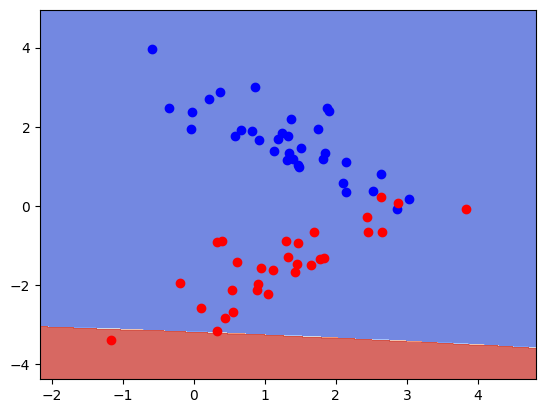

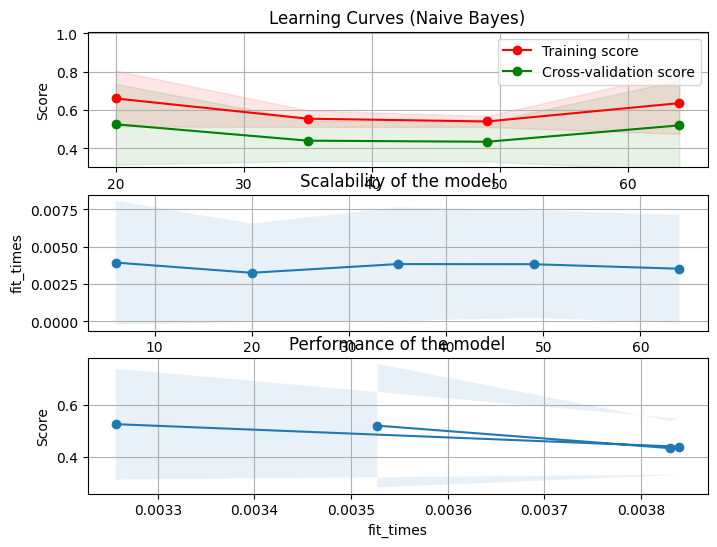

In [ ]:
#variar la cantida de datos


rv, rv1 = data( mu=[1.4,1.4], mu1=[1.4,-1.4],
     cov=[[1.0, -0.8], [-0.8, 1.0]] ,
     cov1= [[1.0, 0.8], [0.8, 1.0]])
X_t, y = sample(N1 = 40, N2 = 40, r = 10)


X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.2,
                                                    random_state=1)
clf = SVC(gamma = 0.001)
clf.fit(X_train, y_train)
fig, ax = plt.subplots()
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X_train[y_train==0][:,0],X_train[y_train==0][:,1],"bo", alpha=1)
plt.plot(X_train[y_train==1][:,0],X_train[y_train==1][:,1],"ro", alpha=1)
print(f"Training error:{clf.score(X_train, y_train):.3f}")
print(f"Test error: {clf.score(X_test, y_test):.3f}" )

fig, axes = plt.subplots(3, 1, figsize=(8, 6))
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#clf = SVC(gamma = 20.0)
#clf.fit(X_t, y)
plot_learning_curve(clf, title, X_t, y, axes=axes, ylim=(0.3, 1.01), cv=cv, n_jobs=4)
plt.show()

# Underfiting

Training error:0.875
Test error: 0.786


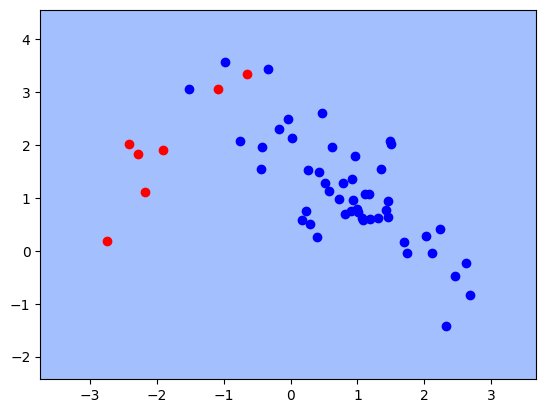

In [ ]:
rv, rv1 = data( mu=[1,1], mu1=[-2,2],
     cov=[[1.0, -0.8], [-0.8, 1.0]] ,
     cov1= [[1.0, 0.5], [0.5, 1.0]])

X_t, y = sample(N1 = 60, N2 = 10, r = 10)

X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.2,
                                                    random_state=1)
clf = SVC(gamma = 0.001)
clf.fit(X_train, y_train)
fig, ax = plt.subplots()
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X_train[y_train==0][:,0],X_train[y_train==0][:,1],"bo", alpha=1)
plt.plot(X_train[y_train==1][:,0],X_train[y_train==1][:,1],"ro", alpha=1)
print(f"Training error:{clf.score(X_train, y_train):.3f}")
print(f"Test error: {clf.score(X_test, y_test):.3f}" )


<!-- # Selección de Modelos y Conjuntos de Entrenamiento/Validación/Prueba
[1] Referencia: https://cs229.stanford.edu/

El hecho de que un algoritmo de aprendizaje ajuste bien un conjunto de entrenamiento no significa que sea una buena hipótesis. Podría sobreajustarse, lo que resultaría en predicciones deficientes en el conjunto de prueba. El error de tu hipótesis, medido en el conjunto de datos con el que entrenaste los parámetros, será menor que el error en cualquier otro conjunto de datos.

Dado que tenemos muchos modelos con diferentes grados polinomiales, podemos usar un enfoque sistemático para identificar la 'mejor' función. Para elegir el modelo de tu hipótesis, puedes probar cada grado del polinomio y observar el resultado del error.

Una forma de dividir nuestro conjunto de datos en tres conjuntos es la siguiente:

- **Conjunto de entrenamiento**: 60%
- **Conjunto de validación cruzada**: 20%
- **Conjunto de prueba**: 20%

Ahora podemos calcular tres valores de error separados para los tres conjuntos diferentes utilizando el siguiente método:

1. Optimiza los parámetros en \( \Theta \) utilizando el conjunto de entrenamiento para cada grado polinomial.

2. Encuentra el grado polinomial \( d \) con el menor error utilizando el conjunto de validación cruzada.

3. Estima el error de generalización utilizando el conjunto de prueba con \( J_{\text{test}} \).

De esta manera, el grado del polinomio \( d \) no ha sido entrenado utilizando el conjunto de prueba. -->


<!--
Tarea :

3.1 Para esta situación tomar el 20% como datos para realizar la validacion cruzada y el 80% paara realizar el entrenamiento. Construir una curva del score en función del parametro gamma del clasificador que se esta empleando. ¿Cual presenta una mejor solucion al problema?.  

3.2 Construir las curvas de aprendizaje  para el modelo descrito, comprobar que la solución es similar a la esperada a través de sklean.

3.3 Elegir, los párametros adecuados para los centros de medias y las matrices de covarianzas y mostrar Mostrar un ejemplo de Overfitting underfitting con el algoritmo generados construido por ustedes.  Analizar los resultados.
 -->


In [ ]:
# Como se construye una curva de aprendizaje?
#import from sklearn.model_selection import ShuffleSplit
#from sklearn import cross_validation

# Notebook con solucion a la tarea
rv, rv1 = data( mu=[1.2,1.4], mu1=[1.4,-1.4],
     cov=[[1.0, -0.8], [-0.8, 1.0]] ,
     cov1= [[1.0, 0.8], [0.8, 1.0]])
X_t, y = sample(N1 = 100, N2 = 100, r = 10)

g=10

#size = np.linspace(0.1, 0.95, 9)
train_score_=[]
test_score_=[]
Strain_score_=[]
Stest_score_=[]
size = np.arange(40, 160, 20)
for s in size:
  a=[]
  b=[]
  for exec in range(0, 10):
    X_train, X_test, y_train, y_test = train_test_split(X_t, y,
                                                        test_size = 0.3)
    arr = np.arange(s)
    index = np.random.permutation(arr)

    clf = SVC(gamma = g)
    clf.fit(X_train[:][index], y_train[index])
    train_score = clf.score(X_train[:][index], y_train[index])

    arr = np.arange(len(y_test))
    index_test =  np.random.permutation(arr)
    test_score = clf.score(X_test[:][index_test], y_test[index_test])

    a.append(train_score)
    b.append(test_score)

  train_score_.append(np.mean(a))
  test_score_.append(np.mean(b))
  Strain_score_.append(np.std(a))
  Stest_score_.append(np.std(b))

train_mean = np.array(train_score_)
test_mean = np.array(test_score_)
train_std = np.array(Strain_score_)
test_std = np.array(Stest_score_)


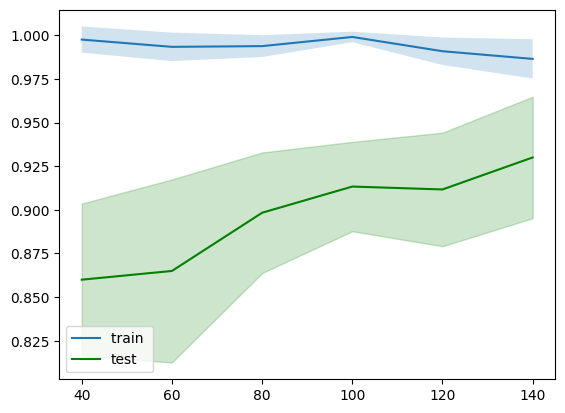

In [ ]:
plt.plot(size, train_mean, label = "train ")
plt.fill_between(size, train_mean-train_std, train_mean+train_std, alpha=0.2)

plt.plot(size, test_mean,"g-" ,label = "test")
plt.fill_between(size, test_mean-test_std, test_mean+test_std,color="g",alpha=0.2)
plt.legend()
#plt.ylim(0.8, 1.1)

Training error:0.975
Test error: 0.925


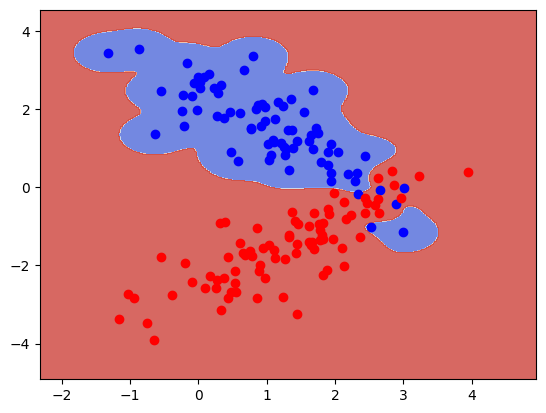

In [ ]:
# Como se hace un make contour
rv, rv1 = data( mu=[1.2,1.4], mu1=[1.4,-1.4],
     cov=[[1.0, -0.8], [-0.8, 1.0]] ,
     cov1= [[1.0, 0.8], [0.8, 1.0]])
X_t, y = sample(N1 = 100, N2 = 100, r = 10)

X_t, y = sample(N1 = 100, N2 = 100, r = 10)

X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.2,
                                                    random_state=1)
clf = SVC(gamma = g)
clf.fit(X_train, y_train)
fig, ax = plt.subplots()
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X_train[y_train==0][:,0],X_train[y_train==0][:,1],"bo", alpha=1)
plt.plot(X_train[y_train==1][:,0],X_train[y_train==1][:,1],"ro", alpha=1)
print(f"Training error:{clf.score(X_train, y_train):.3f}")
print(f"Test error: {clf.score(X_test, y_test):.3f}" )